In [1]:
# Packages necessary for this notebook
import numpy             as np
import pandas            as pd
import xarray            as xr
import seaborn           as sns
import cartopy.crs       as crs
import cartopy.feature   as cfeature
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
# Import the NOAA data from 1981-2019
NOAA = xr.open_dataset(r'D:\CRI_Modelling_PC\Netcdf Data\NOAA\sst.day.mean.PacCst.1981-2019.nc')

In [3]:
# Put in your temperature ranges here:
# All temperatures in Celcius
min_Temp = 5
max_Temp = 17.6

In [4]:
# Get lat and lon data
lat = NOAA.lat.data
lon = NOAA.lon.data

In [5]:
NOAA_years = np.where((pd.DatetimeIndex(NOAA.time.data).year>=1982) & (pd.DatetimeIndex(NOAA.time.data).year<=2018))
NOAA_short = NOAA.sst[(NOAA_years[0]),:,:]

In [6]:
# Create a mask for land, count the days, and average them over years
NOAA_Mask  = NOAA.sst.where(NOAA.sst.isnull(), 1)
NOAA_Count = NOAA_short.where((NOAA_short <= max_Temp) & (NOAA_short >= min_Temp)).groupby('time.year').count(dim='time')
count_Mean = NOAA_Count.mean(dim="year")
NOAA_Final = count_Mean*NOAA_Mask[0,:,:]

In [7]:
# Standard deviation data. We might change this, but for now this works
std_Dev = NOAA_Count.std(dim="year")*NOAA_Mask[0,:,:]

In [8]:
# Just for getting state lines 
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

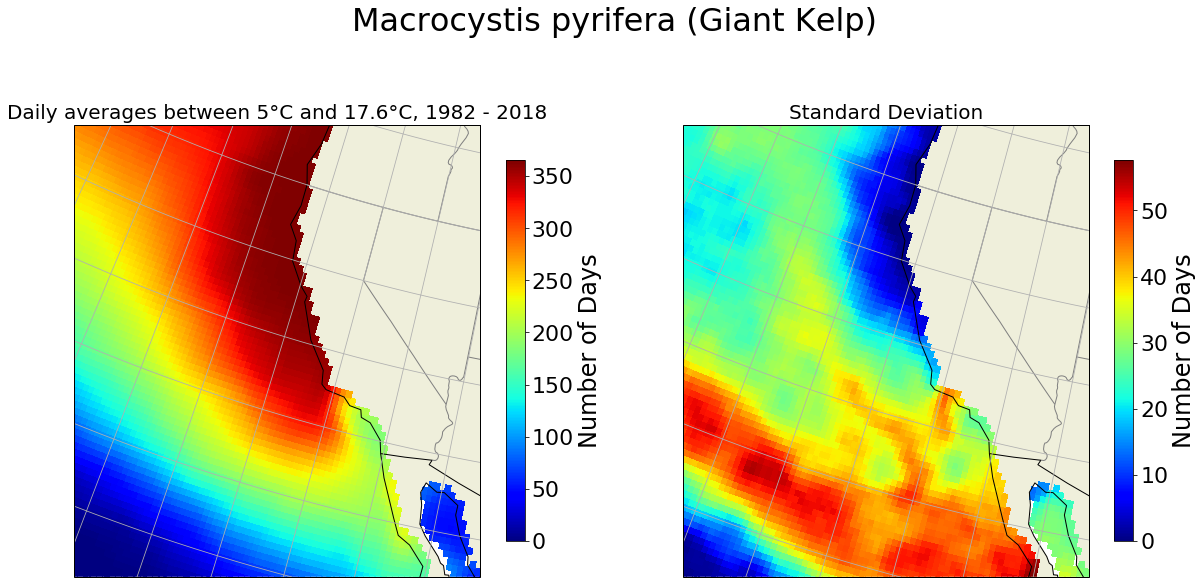

In [9]:
# Creating a figure, change name to species name
fig = plt.figure(figsize=[20,10])
fig.suptitle('Macrocystis pyrifera (Giant Kelp)',fontsize=32)

# Plot the count_Mean data
NOAA_Plot = fig.add_subplot(1,2,1,projection=crs.LambertConformal())
NOAA_Plot.set_title('Daily averages between ' + str(min_Temp) + '\u00b0C and ' + str(max_Temp) + '\u00b0C, 1982 - 2018', fontsize=20)
NOAA_Plot.set_extent([230,245,28,43], crs.Geodetic())
NOAA_Colormesh = NOAA_Plot.pcolormesh(lon, lat, NOAA_Final.data,
             transform=crs.PlateCarree(),
             cmap='jet',vmax=365)
NOAA_Plot.add_feature(cfeature.COASTLINE)
NOAA_Plot.add_feature(cfeature.LAND)
NOAA_Plot.add_feature(cfeature.BORDERS)
NOAA_Plot.add_feature(states_provinces, edgecolor='gray')
NOAA_Plot.gridlines()

# Create a colorbar
colorbar = fig.colorbar(NOAA_Colormesh, shrink=0.7, anchor=('SW'))
colorbar.set_label('Number of Days',fontsize=24)
colorbar.ax.tick_params(labelsize=22)

# Plot the std_Dev data
std_Plot = fig.add_subplot(1,2,2,projection=crs.LambertConformal())
std_Plot.set_title('Standard Deviation', fontsize=20)
std_Plot.set_extent([230,245,28,43], crs.Geodetic())
std_Colormesh = std_Plot.pcolormesh(lon, lat, std_Dev.data,
             transform=crs.PlateCarree(),
             cmap='jet')
std_Plot.add_feature(cfeature.COASTLINE)
std_Plot.add_feature(cfeature.LAND)
std_Plot.add_feature(cfeature.BORDERS)
std_Plot.add_feature(states_provinces, edgecolor='gray')
std_Plot.gridlines()

# A new colorbar
colorbar2 = fig.colorbar(std_Colormesh, shrink=0.7, anchor=('SW'))
colorbar2.set_label('Number of Days',fontsize=24)
colorbar2.ax.tick_params(labelsize=22)

In [10]:
early_years = np.where((pd.DatetimeIndex(NOAA.time.data).year>=1982) & (pd.DatetimeIndex(NOAA.time.data).year<2000))
NOAA_early = NOAA.sst[(early_years[0]),:,:]
later_years = np.where((pd.DatetimeIndex(NOAA.time.data).year>2000) & (pd.DatetimeIndex(NOAA.time.data).year<=2018))
NOAA_later = NOAA.sst[(later_years[0]),:,:]

In [11]:
early_Count = NOAA_early.where((NOAA_early <= max_Temp) & (NOAA_early >= min_Temp)).groupby('time.year').count(dim='time')
early_Mean = early_Count.mean(dim="year")
early_Final = early_Mean*NOAA_Mask[0,:,:]

later_Count = NOAA_later.where((NOAA_later <= max_Temp) & (NOAA_later >= min_Temp)).groupby('time.year').count(dim='time')
later_Mean = later_Count.mean(dim="year")
later_Final = later_Mean*NOAA_Mask[0,:,:]

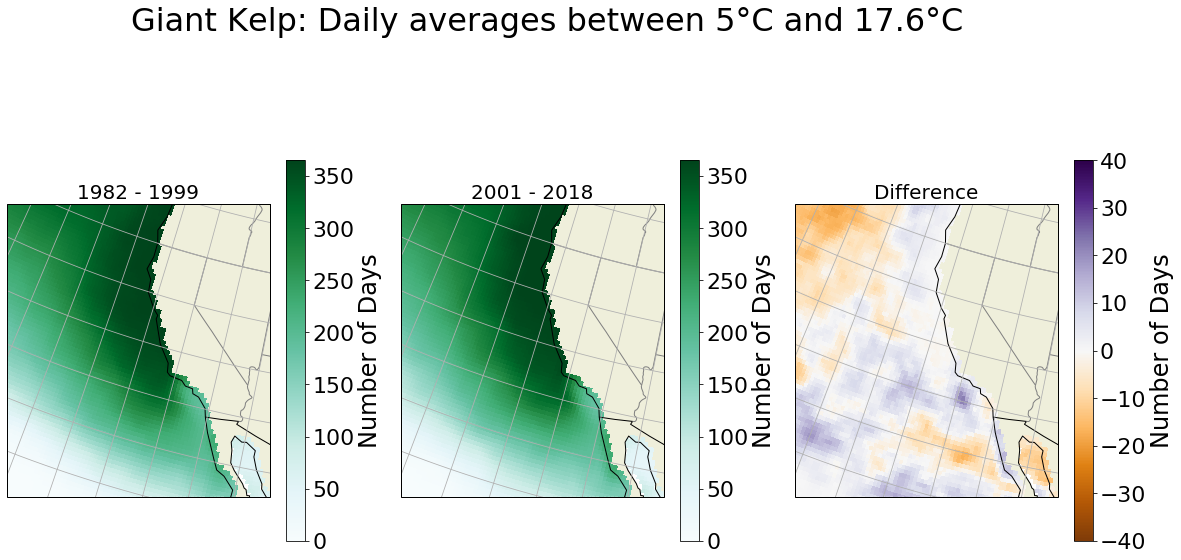

In [19]:
# Creating a figure, change name to species name
fig = plt.figure(figsize=[20,10])
fig.suptitle('Giant Kelp: Daily averages between ' + str(min_Temp) + '\u00b0C and ' + str(max_Temp) + '\u00b0C',fontsize=32)

# Plot the count_Mean data
early_Plot = fig.add_subplot(1,3,1,projection=crs.LambertConformal())
early_Plot.set_title('1982 - 1999', fontsize=20)
early_Plot.set_extent([230,245,28,43], crs.Geodetic())
early_Colormesh = early_Plot.pcolormesh(lon, lat, early_Final.data,
             transform=crs.PlateCarree(),
             cmap='BuGn',vmax=365)
early_Plot.add_feature(cfeature.COASTLINE)
early_Plot.add_feature(cfeature.LAND)
early_Plot.add_feature(cfeature.BORDERS)
early_Plot.add_feature(states_provinces, edgecolor='gray')
early_Plot.gridlines()

# Create a colorbar
colorbar = fig.colorbar(early_Colormesh, shrink=0.7, anchor=('SW'))
colorbar.set_label('Number of Days',fontsize=24)
colorbar.ax.tick_params(labelsize=22)

# Plot the later data
later_Plot = fig.add_subplot(1,3,2,projection=crs.LambertConformal())
later_Plot.set_title('2001 - 2018', fontsize=20)
later_Plot.set_extent([230,245,28,43], crs.Geodetic())
later_Colormesh = later_Plot.pcolormesh(lon, lat, later_Final.data,
             transform=crs.PlateCarree(),
             cmap='BuGn', vmax=365)
later_Plot.add_feature(cfeature.COASTLINE)
later_Plot.add_feature(cfeature.LAND)
later_Plot.add_feature(cfeature.BORDERS)
later_Plot.add_feature(states_provinces, edgecolor='gray')
later_Plot.gridlines()

# A new colorbar
colorbar2 = fig.colorbar(later_Colormesh, shrink=0.7, anchor=('SW'))
colorbar2.set_label('Number of Days',fontsize=24)
colorbar2.ax.tick_params(labelsize=22)

diff_Plot = fig.add_subplot(1,3,3,projection=crs.LambertConformal())
diff_Plot.set_title('Difference', fontsize=20)
diff_Plot.set_extent([230,245,28,43], crs.Geodetic())
diff_Colormesh = diff_Plot.pcolormesh(lon, lat, later_Final.data - early_Final.data,
             transform=crs.PlateCarree(),
             cmap='PuOr',vmin = -40, vmax = 40)
diff_Plot.add_feature(cfeature.COASTLINE)
diff_Plot.add_feature(cfeature.LAND)
diff_Plot.add_feature(cfeature.BORDERS)
diff_Plot.add_feature(states_provinces, edgecolor='gray')
diff_Plot.gridlines()

# A new colorbar
colorbar2 = fig.colorbar(diff_Colormesh, shrink=0.7, anchor=('SW'))
colorbar2.set_label('Number of Days',fontsize=24)
colorbar2.ax.tick_params(labelsize=22)

fig.savefig(r"D:\CRI_Modelling_PC\CRI Maps\Giant_Kelp_Chunks.jpeg", bbox_inches='tight')